In [1]:
#!pip3 install h5py
import h5py
import numpy as np

In [2]:
f = h5py.File('cons_locs_pathways_mc2_Column.h5', 'r')

/locations : Nx3 dataset of neuron locations in 3d space (in um; one per neuron in the indicated population)

/nCellAff : Nx1 dataset of number of afferent connections (one per neuron in the indicated population; 
             NOTE: INCLUDES SOME CONNECTIONS FROM NEURONS OUTSIDE THE VOLUME, SEE ABOVE!)
             
/nCellEff : Nx1 dataset of number of efferent connections (one per neuron in the indicated population; 
             NOTE: INCLUDES SOME CONNECTIONS TO NEURONS OUTSIDE THE VOLUME, SEE ABOVE!)
             
/nSynAff : Nx1 dataset of number of afferent synapses (multiple synapses per connection possible)

/nSynEff : Nx1 dataset of number of efferent synapses

In [3]:
popnames = f.get('populations')
popnames = np.array(popnames)
np.savetxt('popnames.txt',popnames, fmt='%s', delimiter=" ")

mtype_map_content = popnames
n=0
mtype_map = {}
for line in mtype_map_content[0:55]:
    n=n+1 
    mtype_map[n] = str(line)    

In [4]:
n=1
poplocation = f.get('populations/{s}/locations'.format(s=mtype_map[n]))
poplocation = np.array(poplocation)

poplocation2 = f.get('populations/{s}/nCellAff'.format(s=mtype_map[n]))
poplocation2 = np.array(poplocation2)

poplocation = np.concatenate((poplocation,poplocation2), axis=1)

poplocation2 = f.get('populations/{s}/nCellEff'.format(s=mtype_map[n]))
poplocation2 = np.array(poplocation2)

poplocation = np.concatenate((poplocation,poplocation2), axis=1)

poplocation2 = f.get('populations/{s}/nSynAff'.format(s=mtype_map[n]))
poplocation2 = np.array(poplocation2)

poplocation = np.concatenate((poplocation,poplocation2), axis=1)

poplocation2 = f.get('populations/{s}/nSynEff'.format(s=mtype_map[n]))
poplocation2 = np.array(poplocation2)

poplocation = np.concatenate((poplocation,poplocation2), axis=1)

poplocation2 = n*np.ones(poplocation2.shape)
poplocation = np.concatenate((poplocation,poplocation2), axis=1)

np.savetxt('xyz_info_{s}.txt'.format(s=mtype_map[n]),poplocation, fmt='%.4f %.4f %.4f %d %d %d %d %d', delimiter=" ")

In [5]:
poplocationb = poplocation
for line in mtype_map_content[0:55-1]:
    n=n+1 
    poplocation = f.get('populations/{s}/locations'.format(s=mtype_map[n]))
    poplocation = np.array(poplocation)

    poplocation2 = f.get('populations/{s}/nCellAff'.format(s=mtype_map[n]))
    poplocation2 = np.array(poplocation2)

    poplocation = np.concatenate((poplocation,poplocation2), axis=1)

    poplocation2 = f.get('populations/{s}/nCellEff'.format(s=mtype_map[n]))
    poplocation2 = np.array(poplocation2)

    poplocation = np.concatenate((poplocation,poplocation2), axis=1)

    poplocation2 = f.get('populations/{s}/nSynAff'.format(s=mtype_map[n]))
    poplocation2 = np.array(poplocation2)

    poplocation = np.concatenate((poplocation,poplocation2), axis=1)

    poplocation2 = f.get('populations/{s}/nSynEff'.format(s=mtype_map[n]))
    poplocation2 = np.array(poplocation2)

    poplocation = np.concatenate((poplocation,poplocation2), axis=1)
        
    poplocation2 = n*np.ones(poplocation2.shape)
    poplocation = np.concatenate((poplocation,poplocation2), axis=1)
    
    poplocationb =  np.concatenate((poplocationb,poplocation), axis=0)

In [6]:
degreeout = poplocationb[:,3].sum(axis=0)
print('number of afferent connections =',int(degreeout))
degreeout = poplocationb[:,4].sum(axis=0)
print('number of efferent connections =',int(degreeout))
degreeout = poplocationb[:,5].sum(axis=0)
print('number of afferent synapses =',int(degreeout))
degreeout = poplocationb[:,6].sum(axis=0)
print('number of efferent synapses =',int(degreeout))

number of afferent connections = 6422904
number of efferent connections = 4884647
number of afferent synapses = 22449073
number of efferent synapses = 18318635


In [7]:
np.savetxt('xyz_info_mc2.txt',poplocationb, fmt='%.4f %.4f %.4f %d %d %d %d %d', delimiter=" ")

In [8]:
n=1
poplocation = f.get('populations/{s}/locations'.format(s=mtype_map[n]))
poplocation = np.array(poplocation)
np.savetxt('xyz_{s}.txt'.format(s=mtype_map[n]),poplocation, fmt='%f', delimiter=" ")

In [9]:
n=1
m=1
matrix = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[m]))
matrix = np.array(matrix)
np.savetxt('matrix_{s}-{s2}.txt'.format(s=mtype_map[n],s2=mtype_map[m]),matrix, fmt='%d', delimiter=" ")

In [10]:
n=1
matrix = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[1],s2=mtype_map[1]))
matrix = np.array(matrix)
degreeout = matrix.sum(axis=0)
sumdeg = degreeout.sum(axis=0)
print(sumdeg)
# iterate through rows
for i in range(len(mtype_map)-1):
    n=n+1 
    matrix2 = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[1]))
    matrix2 = np.array(matrix2)
    matrix = np.concatenate((matrix,matrix2), axis=0)
    degreeout = matrix.sum(axis=0)
    sumdeg = degreeout.sum(axis=0)

print(sumdeg)

31
1538


In [11]:
#np.savetxt('matrix_{s}-full.txt'.format(s=mtype_map[1]),matrix, fmt='%d', delimiter=" ")

In [12]:
m=1
n=1
matrix = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[1],s2=mtype_map[1]))
matrix = np.array(matrix)
# iterate through rows
for i in range(len(mtype_map)-1):
    n=n+1 
    matrix2 = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[m]))
    matrix2 = np.array(matrix2)
    matrix = np.concatenate((matrix,matrix2), axis=0)
    
degreeout = matrix.sum(axis=0)
sumdeg = degreeout.sum(axis=0)
print (sumdeg,matrix.shape)    

for j in range(len(mtype_map)-1):
    m=m+1
    n=1
    matrixb = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[m]))
    matrixb = np.array(matrixb)
    # iterate through rows
    for i in range(len(mtype_map)-1):
        n=n+1 
        matrix2 = f.get('connectivity/{s}/{s2}/cMat'.format(s=mtype_map[n],s2=mtype_map[m]))
        matrix2 = np.array(matrix2)
        matrixb = np.concatenate((matrixb,matrix2), axis=0)

    matrix = np.concatenate((matrix,matrixb), axis=1)
    #print (matrix.shape)
    degreeout = matrix.sum(axis=0)
    sumdeg = degreeout.sum(axis=0)

print(sumdeg,matrix.shape)

1538 (31346, 59)
7749866 (31346, 31346)


In [13]:
degreeout = matrix.sum(axis=0)
sumdeg = degreeout.sum(axis=0)
print(degreeout)
print(sumdeg)
degreein = matrix.sum(axis=1)
sumdeg = degreein.sum(axis=0)
print(degreein)
print(sumdeg)

[ 11  20   0 ... 270 224 902]
7749866
[ 10  39  98 ...  55 146 273]
7749866


In [14]:
np.savetxt('degree-out.txt',degreeout, fmt='%d', delimiter=" ")
np.savetxt('degree-in.txt',degreein, fmt='%d', delimiter=" ")

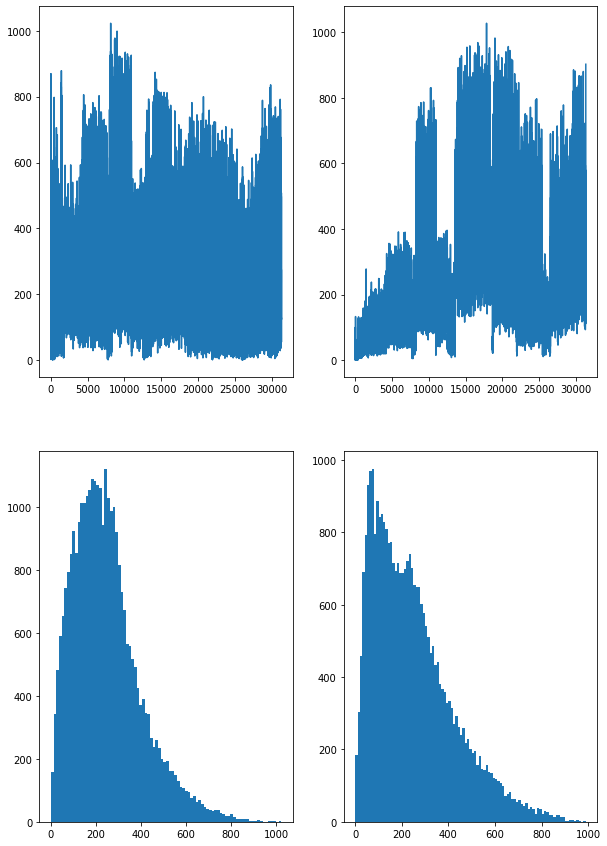

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,15))
ax = figure.add_subplot(221)
ax2 = figure.add_subplot(222)
ax3 = figure.add_subplot(223)
ax4 = figure.add_subplot(224)
_ = ax.plot(degreein)
_ = ax2.plot(degreeout)
_ = ax3.hist(degreein, bins='auto') 
_ = ax4.hist(degreeout, bins=np.arange(0,1000,10)) 

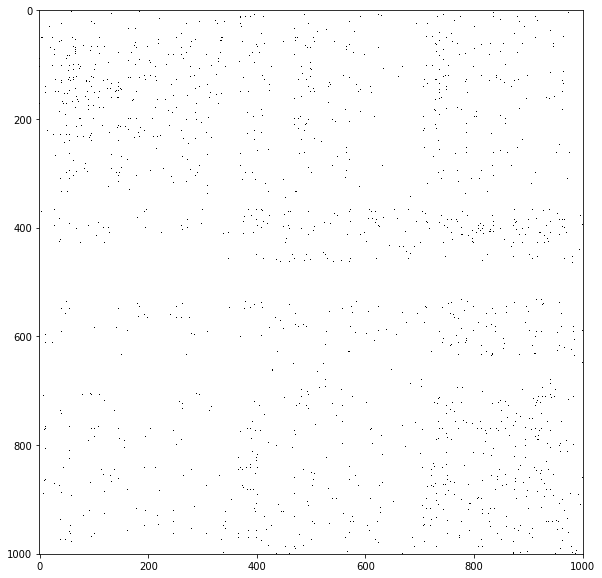

In [16]:
fig = plt.figure(figsize=(10, 10)) 
plt.imshow(matrix[:1001,:1001],cmap="Greys",interpolation="none")